Note 1
This is the file where I will be developing my machine learning model, each section of code will have a markdown before it, detailing the progress

import and loading dataset

In [1]:
import pandas as pd 
data = pd.read_csv("creditriskdataset.csv")

the following commands is to gather insight into the dataset and identify any anomalities 

In [2]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.shape

(32581, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data.isnull()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

dropping columns that are not relevant to the project objective and rows that are missing at least one value from a column, reasoning will be in my dissertation

In [2]:
data.dropna(subset=['person_emp_length', 'loan_int_rate'], inplace=True)

In [9]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [3]:
data.drop(columns=['loan_intent', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_grade                  32581 non-null  object 
 5   cb_person_default_on_file   32581 non-null  object 
 6   cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ MB


In [4]:
unique_values = data['person_age'].unique() 
print(unique_values)

[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  50  37  39  40  43  41  46  38  47  42  44  48  45  49  58  65  51
  53  66  57  59  62  54  60  55  52  61  64  70  78  69  56  73  63  80
  84  76  67]


In [13]:
print(data.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


In [4]:
data.drop(data[(data['person_age'] == 144) | (data['person_age'] == 123)].index, inplace=True)

In [6]:
updated_unique_values = data ['person_age'].unique()
print(updated_unique_values)

[22 21 25 23 24 26 20 32 34 29 33 28 35 31 27 30 36 50 37 39 40 43 41 46
 38 47 42 44 48 45 49 58 65 51 53 66 57 59 62 54 60 55 52 61 64 70 78 69
 56 73 63 80 84 76 67]


In [5]:
updated_income = data ['person_income'].unique()
print(updated_income)

[ 59000   9600  65500 ...  39240 129000 720000]


In [6]:
data ['person_income'].max()

2039784

In [22]:
data.shape

(32576, 7)

one-hot encoding for person_home_ownership and cb_person_default_on_file

In [7]:
categorical_columns = ['person_home_ownership','cb_person_default_on_file']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded.head())

   person_age  person_income  person_emp_length loan_grade  \
0          22          59000              123.0          D   
1          21           9600                5.0          B   
2          25           9600                1.0          C   
3          23          65500                4.0          C   
4          24          54400                8.0          C   

   cb_person_cred_hist_length  person_home_ownership_OTHER  \
0                           3                        False   
1                           2                        False   
2                           3                        False   
3                           2                        False   
4                           4                        False   

   person_home_ownership_OWN  person_home_ownership_RENT  \
0                      False                        True   
1                       True                       False   
2                      False                       False   
3             

In [24]:
unique_employment = data['person_emp_length'].unique() 
print(unique_employment)

[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]


In [25]:
unique_ownership = data ['person_home_ownership'].unique()
print(unique_ownership)

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [26]:
unique_loan_default = data ['cb_person_default_on_file'].unique()
print(unique_loan_default)

['Y' 'N']


In [8]:
data['person_age'] = data['person_age'].astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28634 entries, 0 to 32580
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28634 non-null  float64
 1   person_income               28634 non-null  int64  
 2   person_home_ownership       28634 non-null  object 
 3   person_emp_length           28634 non-null  float64
 4   loan_grade                  28634 non-null  object 
 5   cb_person_default_on_file   28634 non-null  object 
 6   cb_person_cred_hist_length  28634 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ MB


In [9]:
data = data[data['person_emp_length'] <= data['person_age']]

In [10]:
unique_employment = data['person_emp_length'].unique() 
print(unique_employment)

[ 5.  1.  4.  8.  2.  6.  7.  0.  9.  3. 10. 11. 18. 12. 17. 14. 16. 13.
 19. 15. 22. 20. 21. 24. 23. 26. 25. 27. 31. 28. 41. 34. 29. 38. 30.]


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28632 entries, 1 to 32580
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28632 non-null  float64
 1   person_income               28632 non-null  int64  
 2   person_home_ownership       28632 non-null  object 
 3   person_emp_length           28632 non-null  float64
 4   loan_grade                  28632 non-null  object 
 5   cb_person_default_on_file   28632 non-null  object 
 6   cb_person_cred_hist_length  28632 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ MB


In [10]:
data.drop(columns=['loan_grade'], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28632 entries, 1 to 32580
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28632 non-null  float64
 1   person_income               28632 non-null  int64  
 2   person_home_ownership       28632 non-null  object 
 3   person_emp_length           28632 non-null  float64
 4   cb_person_default_on_file   28632 non-null  object 
 5   cb_person_cred_hist_length  28632 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [17]:
unique_ownership = data ['person_home_ownership'].unique()
print(unique_ownership)

['OWN' 'MORTGAGE' 'RENT' 'OTHER']


In [11]:
data = data[data['person_home_ownership'] != 'OTHER' ]

In [22]:
unique_ownership = data ['person_home_ownership'].unique()
print(unique_ownership)

['OWN' 'MORTGAGE' 'RENT']


In [12]:
categorical_columns = ['person_home_ownership','cb_person_default_on_file']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded.head())

   person_age  person_income  person_emp_length  cb_person_cred_hist_length  \
1        21.0           9600                5.0                           2   
2        25.0           9600                1.0                           3   
3        23.0          65500                4.0                           2   
4        24.0          54400                8.0                           4   
5        21.0           9900                2.0                           2   

   person_home_ownership_OWN  person_home_ownership_RENT  \
1                       True                       False   
2                      False                       False   
3                      False                        True   
4                      False                        True   
5                       True                       False   

   cb_person_default_on_file_Y  
1                        False  
2                        False  
3                        False  
4                         True  

In [13]:
data = data.rename(columns= {"person_age": "Age", "person_income": "Income", "person_emp_length": "Employment", "cb_person_cred_hist_length": "Credit History",
                              "person_home_ownership": "Home Ownership", "cb_person_default_on_file": "Defaulted on Loan"})

In [12]:
data.head(15)

,Age,Income,Home Ownership,Employment,Defaulted on Loan,Credit History
1,21.0,9600,OWN,5.0,N,2
2,25.0,9600,MORTGAGE,1.0,N,3
3,23.0,65500,RENT,4.0,N,2
4,24.0,54400,RENT,8.0,Y,4
5,21.0,9900,OWN,2.0,N,2
6,26.0,77100,RENT,8.0,N,3
7,24.0,78956,RENT,5.0,N,4
8,24.0,83000,RENT,8.0,N,2
9,21.0,10000,OWN,6.0,N,3
10,22.0,85000,RENT,6.0,N,4


In [14]:
data = data.rename(columns={"Employment": "Employment Years", "Credit History": "Credit History Years"})

In [14]:
data.head(3)

,Age,Income,Home Ownership,Employment Years,Defaulted on Loan,Credit History Years
1,21.0,9600,OWN,5.0,N,2
2,25.0,9600,MORTGAGE,1.0,N,3
3,23.0,65500,RENT,4.0,N,2


In [15]:
data['Credit History Years'] = data['Credit History Years'].astype(float)
data['Income'] = data['Income'].astype(float)

In [18]:
data.head(2)

,Age,Income,Home Ownership,Employment Years,Defaulted on Loan,Credit History Years
1,21.0,9600.0,OWN,5.0,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,N,3.0


In [16]:
data.head(5)

,Age,Income,Home Ownership,Employment Years,Defaulted on Loan,Credit History Years
1,21.0,9600.0,OWN,5.0,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,N,3.0
3,23.0,65500.0,RENT,4.0,N,2.0
4,24.0,54400.0,RENT,8.0,Y,4.0
5,21.0,9900.0,OWN,2.0,N,2.0


In [14]:
data.dtypes

Age                     float64
Income                  float64
Home Ownership           object
Employment Years        float64
Defaulted on Loan        object
Credit History Years    float64
dtype: object

looking for trends 

In [16]:
import seaborn as sns

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Age'>

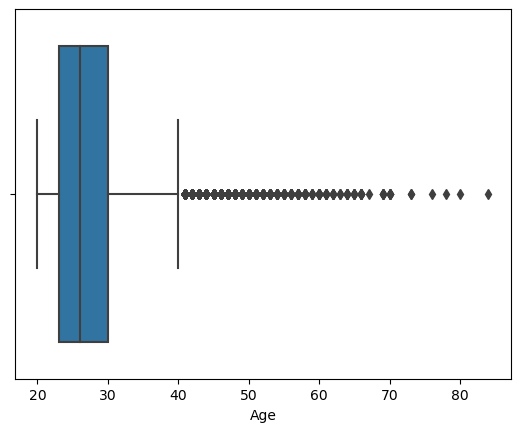

In [18]:
sns.boxplot(x=data['Age'])

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Income'>

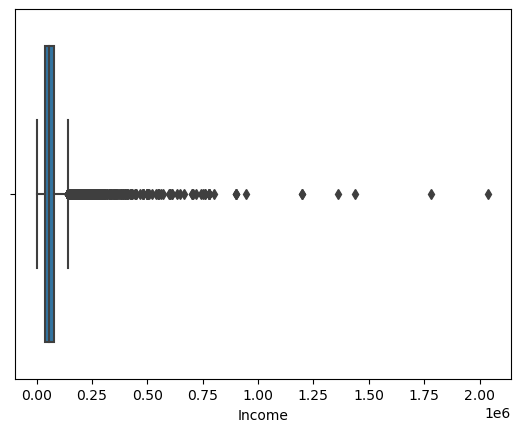

In [16]:
sns.boxplot(x=data['Income'])

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Employment Years'>

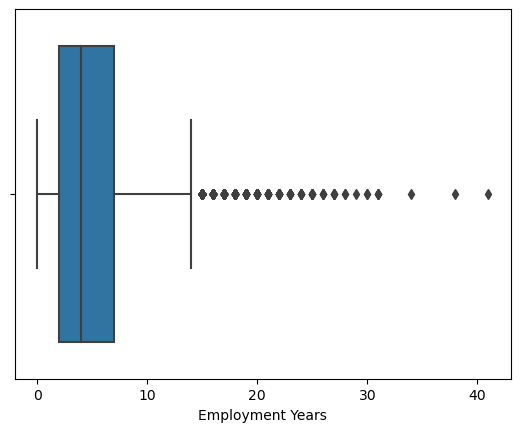

In [17]:
sns.boxplot(x=data['Employment Years'])

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Credit History Years'>

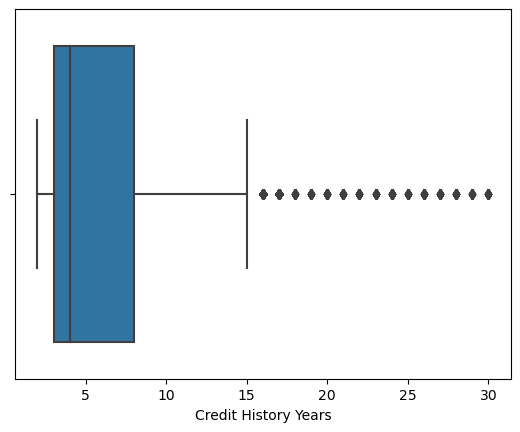

In [19]:
sns.boxplot(x=data['Credit History Years'])

In [14]:
import matplotlib as plt

In [23]:
import pandas as pd 
grouped_data = data.groupby('Home Ownership')['Income'].mean()
print(grouped_data)

Home Ownership
MORTGAGE    81081.900915
OWN         59549.615420
RENT        55495.819150
Name: Income, dtype: float64


In [24]:
import pandas as pd 
grouped_data = data.groupby('Defaulted on Loan')['Income'].mean()
print(grouped_data)

Defaulted on Loan
N    66424.420691
Y    66201.952353
Name: Income, dtype: float64


In [25]:
grouped_data = data.groupby('Defaulted on Loan')['Employment Years'].mean()
print(grouped_data)

Defaulted on Loan
N    4.839763
Y    4.523134
Name: Employment Years, dtype: float64


In [26]:
grouped_data = data.groupby('Defaulted on Loan')['Credit History Years'].mean()
print(grouped_data)

Defaulted on Loan
N    5.779147
Y    5.868084
Name: Credit History Years, dtype: float64


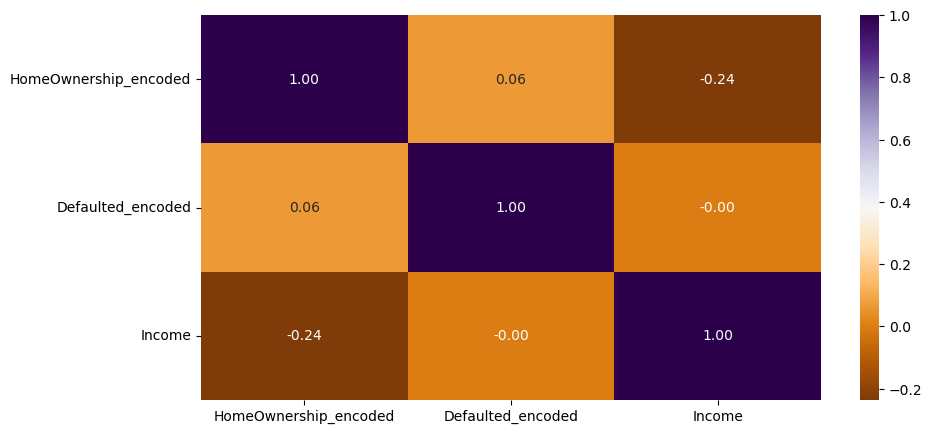

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['HomeOwnership_encoded'] = label_encoder.fit_transform(data['Home Ownership'])
data['Defaulted_encoded'] = label_encoder.fit_transform(data['Defaulted on Loan'])
plt.figure(figsize=(10,5))
columns_for_correlation = ['HomeOwnership_encoded','Defaulted_encoded', 'Income']
correlation_data = data[columns_for_correlation]
c = correlation_data.corr()
sns.heatmap(c, cmap="PuOr", annot=True, fmt=".2f")
plt.show()



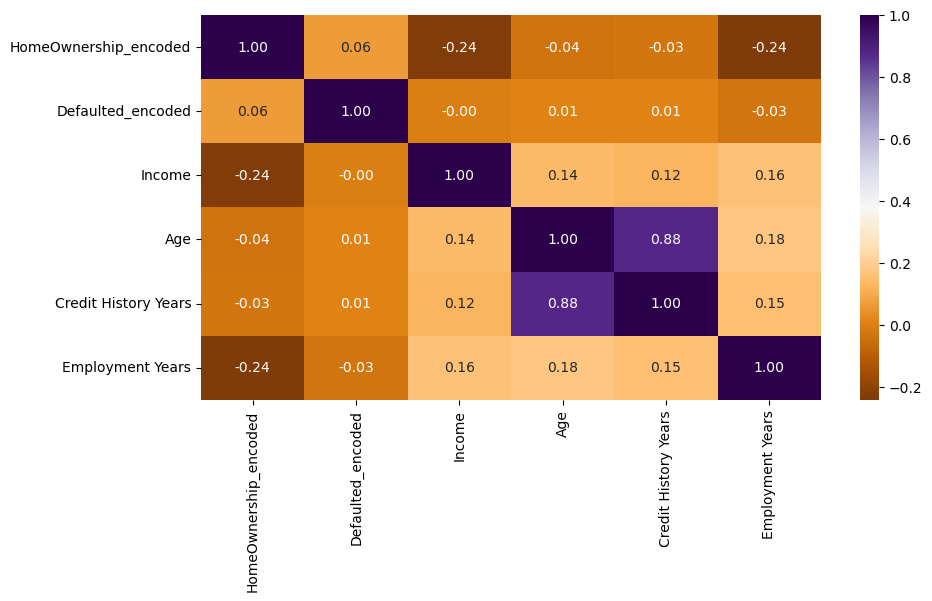

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['HomeOwnership_encoded'] = label_encoder.fit_transform(data['Home Ownership'])
data['Defaulted_encoded'] = label_encoder.fit_transform(data['Defaulted on Loan'])
plt.figure(figsize=(10,5))
columns_for_correlation = ['HomeOwnership_encoded','Defaulted_encoded', 'Income', 'Age', 'Credit History Years', 'Employment Years']
correlation_data = data[columns_for_correlation]
c = correlation_data.corr()
sns.heatmap(c, cmap="PuOr", annot=True, fmt=".2f")
plt.show()


In [15]:
data.head()

,Age,Income,Home Ownership,Employment Years,Defaulted on Loan,Credit History Years
1,21.0,9600.0,OWN,5.0,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,N,3.0
3,23.0,65500.0,RENT,4.0,N,2.0
4,24.0,54400.0,RENT,8.0,Y,4.0
5,21.0,9900.0,OWN,2.0,N,2.0


Data pre-processing completed, starting the training and testing stage

In [16]:
data.head(10)

,Age,Income,Home Ownership,Employment Years,Defaulted on Loan,Credit History Years
1,21.0,9600.0,OWN,5.0,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,N,3.0
3,23.0,65500.0,RENT,4.0,N,2.0
4,24.0,54400.0,RENT,8.0,Y,4.0
5,21.0,9900.0,OWN,2.0,N,2.0
6,26.0,77100.0,RENT,8.0,N,3.0
7,24.0,78956.0,RENT,5.0,N,4.0
8,24.0,83000.0,RENT,8.0,N,2.0
9,21.0,10000.0,OWN,6.0,N,3.0
10,22.0,85000.0,RENT,6.0,N,4.0


In [21]:
categorical_columns = ['Home Ownership','Defaulted on Loan']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded.head())

    Age   Income  Employment Years  Credit History Years  \
1  21.0   9600.0               5.0                   2.0   
2  25.0   9600.0               1.0                   3.0   
3  23.0  65500.0               4.0                   2.0   
4  24.0  54400.0               8.0                   4.0   
5  21.0   9900.0               2.0                   2.0   

   HomeOwnership_encoded  Defaulted_encoded  Home Ownership_OWN  \
1                      1                  0                True   
2                      0                  0               False   
3                      2                  0               False   
4                      2                  1               False   
5                      1                  0                True   

   Home Ownership_RENT  Defaulted on Loan_Y  
1                False                False  
2                False                False  
3                 True                False  
4                 True                 True  
5     

Splitting the dataset in feature and target variable - TV: defaulted on loan, FV: other variables --

In [22]:
feature_columns = ['Age', 'Income', 'HomeOwnership_encoded', 'Employment Years', 'Credit History Years']
X = data[feature_columns]
y = data['Defaulted_encoded']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

Debugging to see issues 

In [23]:
# Print the shape and type of input features (X)
print("Shape of X:", X.shape)
print("Type of X:", type(X))

# Print the shape and type of target labels (y)
print("Shape of y:", y.shape)
print("Type of y:", type(y))


Shape of X: (28538, 5)
Type of X: <class 'pandas.core.frame.DataFrame'>
Shape of y: (28538,)
Type of y: <class 'pandas.core.series.Series'>


In [24]:
# Check for NaN values in input features (X)
print("NaN values in X:", X.isnull().sum())

# Check for NaN values in target labels (y)
print("NaN values in y:", y.isnull().sum())


NaN values in X: Age                     0
Income                  0
Home Ownership          0
Employment Years        0
Credit History Years    0
dtype: int64
NaN values in y: 0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

array([[4677,    0],
       [1031,    0]])

Further analysiing the performance of the classification model

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8193763139453398
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[4677    0]
 [1031    0]]


/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBOOST CLASSIFIER

In [21]:
import xgboost
from sklearn.metrics import accuracy_score
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8163980378416258


In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4648   29]
 [1019   12]]


RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define class weights
# Assuming your dataset has two classes, 0 and 1
# You need to adjust the weights according to the class imbalance in your dataset
class_weights = {0: 1, 1: 20} 

# Create RandomForestClassifier with class weights
rf = RandomForestClassifier(class_weight=class_weights)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.7592852137351086
Confusion Matrix:
[[4224  453]
 [ 921  110]]


In [29]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4677    0]
 [1030    1]]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.779957953749124
Precision: 0.2222222222222222
Recall: 0.08729388942774007
F1-score: 0.12534818941504178
Confusion Matrix:
 [[4362  315]
 [ 941   90]]


SUPPORT VECTOR MACHINES

Degree - 1

In [18]:
from sklearn import svm, metrics
#creating a SVM classifer
clf = svm.SVC(kernel='poly', degree = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

Accuracy: 0.8193763139453398


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8193763139453398
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[4677    0]
 [1031    0]]


/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NEURAL NETWORKS

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Confusion Matrix:
[[   0 4677]
 [   0 1031]]
Accuracy: 0.18062368605466012


/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


REVIEWING DATASET

In [15]:
data["Defaulted_encoded"].value_counts()

Defaulted_encoded
0    23459
1     5079
Name: count, dtype: int64

There is a class imbalance - so using SMOTE to address this issue - trying with logistic regression first

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n:", classification_report(y_test, y_pred))


/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

Accuracy: 0.8193763139453398
Classification Report:
:               precision    recall  f1-score   support

           0       0.82      1.00      0.90      4677
           1       0.00      0.00      0.00      1031

    accuracy                           0.82      5708
   macro avg       0.41      0.50      0.45      5708
weighted avg       0.67      0.82      0.74      5708



/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_classifer = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifer.fit(X_resampled, y_resampled)

y_pred_rf = rf_classifer.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4677
           1       0.22      0.15      0.17      1031

    accuracy                           0.75      5708
   macro avg       0.52      0.51      0.51      5708
weighted avg       0.71      0.75      0.73      5708



/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ADASYN

In [20]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

#LOGISTIC REGRESSION

X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
log_reg_model = LogisticRegression()
log_reg_model.fit(X_resampled, y_resampled)

y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test,y_pred_log_reg))

#RANDOM FOREST

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

Logistic Regression results:
Accuracy: 0.18062368605466012
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4677
           1       0.18      1.00      0.31      1031

    accuracy                           0.18      5708
   macro avg       0.09      0.50      0.15      5708
weighted avg       0.03      0.18      0.06      5708

Random Forest Results:
Accuracy: 0.7452697967764541
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4677
           1       0.21      0.15      0.17      1031

    accuracy                           0.75      5708
   macro avg       0.52      0.51      0.51      5708
weighted avg       0.71      0.75      0.73      5708



/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
